In [36]:
import pandas as pd

df = pd.read_csv("c:/data/iris/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [37]:
df[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]].groupby(
    "Species"
).mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


Text(0, 0.5, 'SepalWidth')

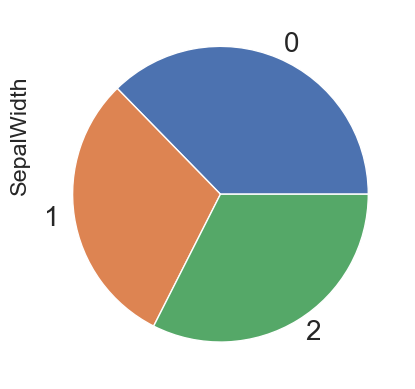

In [38]:
import matplotlib.pyplot as plt

# 파이차트
sums_by_species = df.groupby("Species").sum()
var = "SepalWidth"
sums_by_species[var].plot(kind="pie", fontsize=20)
plt.ylabel(var, horizontalalignment="left")
# plt.savefig('iris_pie.png')

         SepalLength  SepalWidth  PetalLength  PetalWidth  \
Species                                                     
0              250.3       170.9         73.2        12.2   
1              296.8       138.5        213.0        66.3   
2              329.4       148.7        277.6       101.3   

                                                      Name  
Species                                                     
0        setosasetosasetosasetosasetosasetosasetosaseto...  
1        versicolorversicolorversicolorversicolorversic...  
2        virginicavirginicavirginicavirginicavirginicav...  


<Axes: xlabel='Species'>

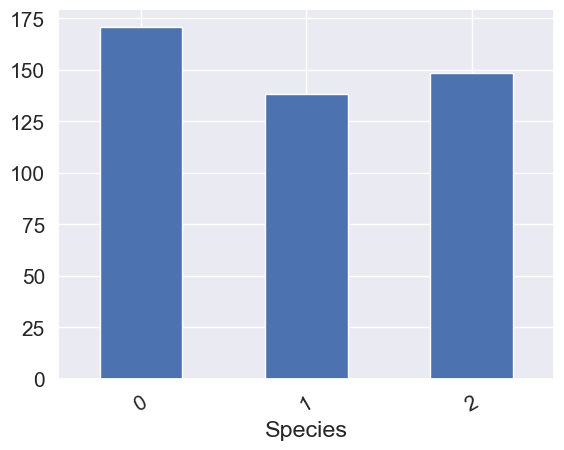

In [39]:
# 품종별 변수 합계
sums_by_species = df.groupby("Species").sum()
print(sums_by_species)
var = "SepalWidth"

# rot 글자회전(rotation)
# 꽃받침 너비(cm) 기준 막대 그래프
sums_by_species[var].plot(kind="bar", fontsize=15, rot=30)

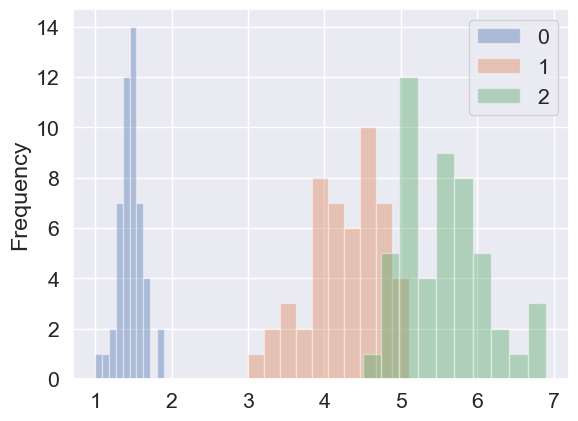

In [40]:
# 품종별 꽃잎 길이
for spec in df["Species"].unique():
    subdf = df[df["Species"] == spec]
    subdf["PetalLength"].plot(kind="hist", alpha=0.4, label=spec)

plt.legend(loc="upper right")

In [41]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11748\2100450784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Species", data=df, palette=colors)


Text(0.5, 1.0, 'iris\n (0: setosa, 1:versicolor, 2: virginica)')

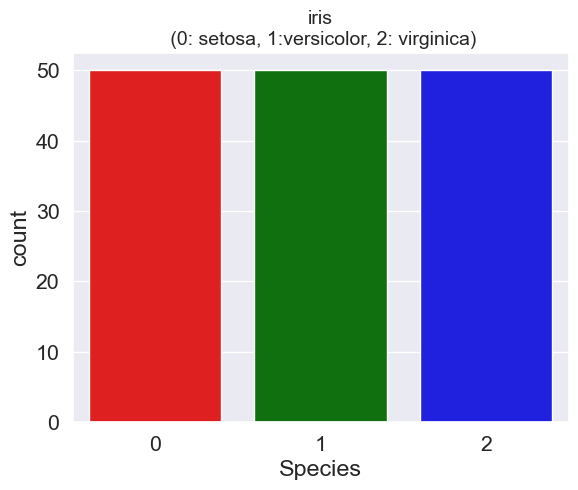

In [42]:
import seaborn as sns

colors = ["red", "green", "blue"]

sns.countplot(x="Species", data=df, palette=colors)
plt.title("iris\n (0: setosa, 1:versicolor, 2: virginica)", fontsize=14)

In [43]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X=df[cols]
y=df['Species']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.9666666666666667
검증용:  1.0


In [45]:
# confusion matrix(혼동행렬, 정오분류표) 출력

from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [46]:
df_cm = pd.DataFrame(cm, index=[0, 1, 2], columns=[0, 1, 2])
df_cm

,0,1,2
0,10,0,0
1,0,10,0
2,0,0,10


<Axes: title={'center': 'Confusion Matrix'}>

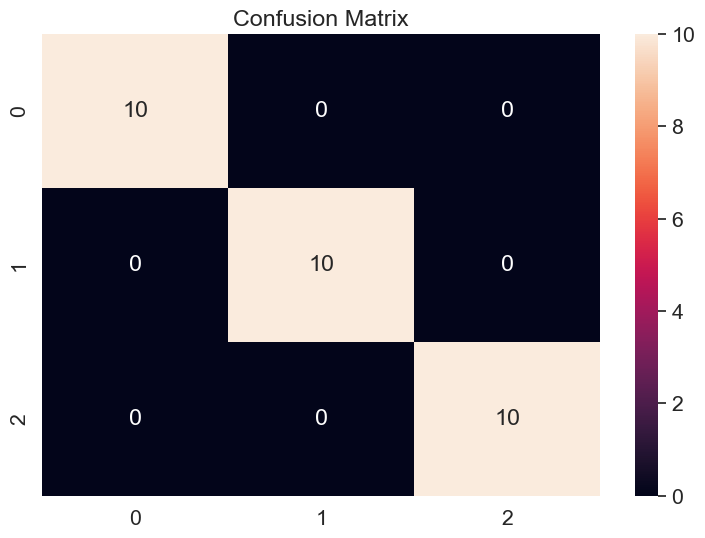

In [47]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [48]:
flowers = ["setosa", "versicolor", "virginica"]
X_new = [[7, 3, 5, 1.4]]
pred = model.predict(X_new)
flowers[pred[0]]

c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'versicolor'

In [49]:
import joblib

joblib.dump(model, "c:/data/iris/iris_logit.model")

['c:/data/iris/iris_logit.model']